Build a regression model.

In [23]:
import pandas as pd

# merged_df2.to_csv('/Users/habeelabdi/Desktop/LL/LL 2/merged_df2.csv', index=False)
merged_df2 = pd.read_csv('/Users/habeelabdi/Desktop/LL/LL 2/merged_df2.csv')

display((merged_df2).head())

,id_df1,alias,name_df1,image_url,is_closed,url,review_count,categories,rating,transactions,...,location.state,location.display_address,empty_slots,extra,free_bikes,id_bike_stations,latitude_bike_stations,longitude_bike_stations,name_bike_stations,timestamp
0,kktb-uIc2YjNWOdbW4ktCg,delina-restaurant-toronto,Delina Restaurant,https://s3-media4.fl.yelpcdn.com/bphoto/U66lN3...,False,https://www.yelp.com/biz/delina-restaurant-tor...,56,"[{'alias': 'mideastern', 'title': 'Middle East...",4.5,[],...,ON,"['1891 Queen Street E', 'Toronto, ON M4L 1H3',...",4,"{'address': 'Queen St. E / Eastern Ave', 'alti...",10,973748f7f27229b41ca0d2a96dea777e,43.667208,-79.312315,Queen St. E / Eastern Ave,2023-12-09T05:40:14.358000Z
1,kktb-uIc2YjNWOdbW4ktCg,delina-restaurant-toronto,Delina Restaurant,https://s3-media4.fl.yelpcdn.com/bphoto/U66lN3...,False,https://www.yelp.com/biz/delina-restaurant-tor...,56,"[{'alias': 'mideastern', 'title': 'Middle East...",4.5,[],...,ON,"['1891 Queen Street E', 'Toronto, ON M4L 1H3',...",11,"{'address': 'Orchard Park', 'altitude': 0.0, '...",8,675628c054189e3bce23785d6574a24d,43.669080,-79.314900,Orchard Park,2023-12-09T05:40:14.700000Z
2,kktb-uIc2YjNWOdbW4ktCg,delina-restaurant-toronto,Delina Restaurant,https://s3-media4.fl.yelpcdn.com/bphoto/U66lN3...,False,https://www.yelp.com/biz/delina-restaurant-tor...,56,"[{'alias': 'mideastern', 'title': 'Middle East...",4.5,[],...,ON,"['1891 Queen Street E', 'Toronto, ON M4L 1H3',...",4,{'address': 'Queen St E and Joseph Duggan Rd -...,14,010507feed5b8d87c40cd95933ed5654,43.667763,-79.308117,Queen St E / Joseph Duggan Rd,2023-12-09T05:40:14.312000Z
3,uChnTTQzV7Nu7EDrluF6uw,sauvignon-bistro-toronto-2,Sauvignon Bistro,https://s3-media2.fl.yelpcdn.com/bphoto/MEYYbe...,False,https://www.yelp.com/biz/sauvignon-bistro-toro...,42,"[{'alias': 'newcanadian', 'title': 'Canadian (...",4.0,[],...,ON,"['1862 Queen Street E', 'Toronto, ON M4L 1H1',...",4,"{'address': 'Queen St. E / Eastern Ave', 'alti...",10,973748f7f27229b41ca0d2a96dea777e,43.667208,-79.312315,Queen St. E / Eastern Ave,2023-12-09T05:40:14.358000Z
4,uChnTTQzV7Nu7EDrluF6uw,sauvignon-bistro-toronto-2,Sauvignon Bistro,https://s3-media2.fl.yelpcdn.com/bphoto/MEYYbe...,False,https://www.yelp.com/biz/sauvignon-bistro-toro...,42,"[{'alias': 'newcanadian', 'title': 'Canadian (...",4.0,[],...,ON,"['1862 Queen Street E', 'Toronto, ON M4L 1H1',...",11,"{'address': 'Orchard Park', 'altitude': 0.0, '...",8,675628c054189e3bce23785d6574a24d,43.669080,-79.314900,Orchard Park,2023-12-09T05:40:14.700000Z


Provide model output and an interpretation of the results. 

In [43]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import ttest_ind

features = ['distance', 'review_count', 'empty_slots', 'latitude_bike_stations', 'longitude_bike_stations']

# Data Preprocessing
merged_df2[features] = merged_df2[features].apply(pd.to_numeric, errors='coerce') 
merged_df2[features] = merged_df2[features].fillna(merged_df2[features].mean())  


X = sm.add_constant(merged_df2[features])
y = merged_df2['free_bikes']

model = sm.OLS(y, X)
results = model.fit()

# 4. Print the summary
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     15.99
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           5.21e-11
Time:                        21:20:38   Log-Likelihood:                -200.12
No. Observations:                  89   AIC:                             412.2
Df Residuals:                      83   BIC:                             427.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [25]:
from scipy.stats import shapiro

residuals = results.resid
residuals
shapiro_test = shapiro(residuals)

print("Shapiro-Wilk test statistic:", shapiro_test.statistic)
print("Shapiro-Wilk test p-value:", shapiro_test.pvalue)
print("The test statistic is 0.3398, indicating a relatively high value (close to 1).")

Shapiro-Wilk test statistic: 0.9339823126792908
Shapiro-Wilk test p-value: 0.00021235273743513972
The test statistic is 0.9562, indicating a relatively high value (close to 1).


In [26]:
residuals = results.resid
residuals

0     0.511447
1     0.604696
2     0.443335
3     0.103691
4     0.196939
        ...   
84    1.865384
85   -0.109092
86   -1.627849
87    0.249408
88    0.355758
Length: 89, dtype: float64

<Axes: ylabel='Count'>

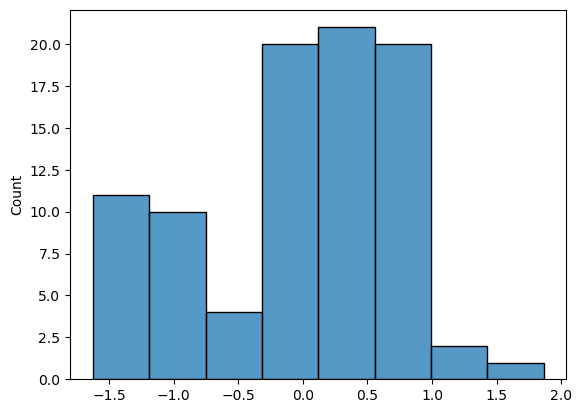

In [31]:
import seaborn as sns

# sns.set_theme(palette='colorblind')
sns.histplot(residuals)

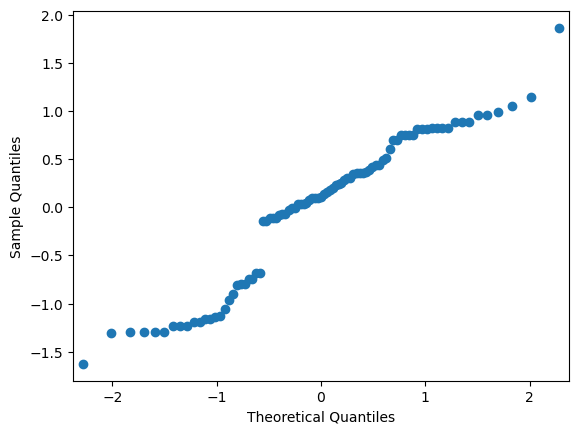

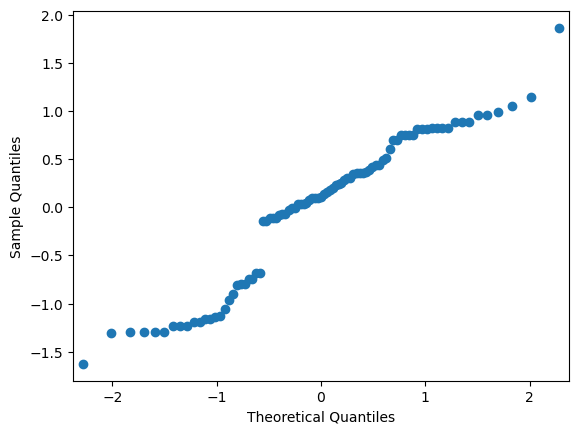

In [38]:
sm.qqplot(residuals)


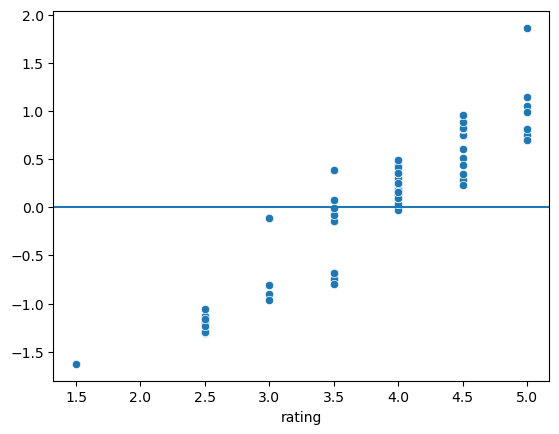

In [33]:
ax = sns.scatterplot(x=merged_df2['rating'], y=residuals)
ax.axhline(0) 

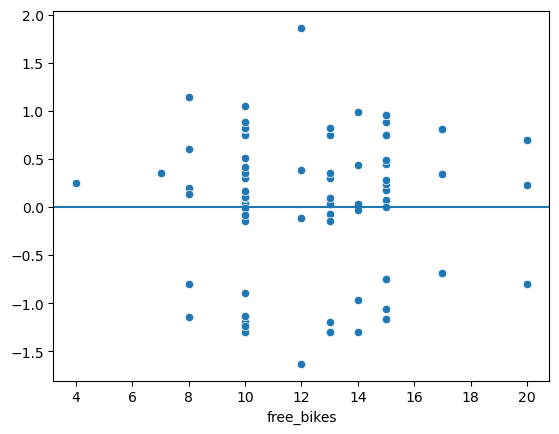

In [39]:
ax = sns.scatterplot(x=merged_df2['free_bikes'], y=residuals)
ax.axhline(0) 

In [40]:

import statsmodels.api as sm

X = merged_df2[['rating']]
y = merged_df2['free_bikes']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid

stat, p, f_stat, f_p = sm.stats.diagnostic.het_breuschpagan(residuals, model.model.exog)
print("P-value for residuals:", p)
print("P-value for F-statistic:", f_p)

P-value for residuals: 0.0695593074402955
P-value for F-statistic: 0.0709147968245217


since this p-value (0.0709) is greater than 0.05, we do not have enough evidence to reject the null hypothesis. This supports the conclusion that there is no strong evidence of heteroscedasticity.
Since this p-value (0.0696) is greater than the common significance level of 0.05, we do not have sufficient evidence to reject the null hypothesis of homoscedasticity. In other words, there is no strong indication of heteroscedasticity in the residuals.